In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/mansoor-work/dataset/merged_samples_mouse.csv")

In [ ]:
data_frame.shape

(27994, 523)

In [ ]:
data_frame.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F514,F515,F516,F517,F518,F519,F520,F521,F522,positive
0,43,130,518,2410,137,416,1648,507,1496,2063,...,0,0,4,0,0,0,5,0,0,1
1,38,135,605,3027,124,473,2195,482,1889,2068,...,0,0,0,0,0,0,0,0,0,1
2,51,174,724,3366,168,574,2382,642,2162,2694,...,0,0,0,0,5,0,0,0,0,1
3,39,138,606,2946,119,428,1878,439,1600,1781,...,0,0,5,0,0,2,0,0,0,1
4,46,166,742,3658,151,514,2220,617,2010,2809,...,0,0,0,0,0,2,6,0,0,1


In [ ]:
data_frame.tail(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F514,F515,F516,F517,F518,F519,F520,F521,F522,positive
27989,54,171,677,3015,183,574,2260,705,2202,2943,...,0,0,0,0,0,0,0,0,0,0
27990,37,100,334,1270,89,240,800,259,700,839,...,0,0,0,0,9,0,9,0,0,0
27991,30,95,389,1835,84,268,1100,292,920,1134,...,0,0,0,0,0,0,0,0,0,0
27992,40,127,491,2083,126,411,1601,462,1503,1878,...,0,5,0,0,0,0,0,0,0,0
27993,49,152,600,2732,149,472,1916,577,1798,2555,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print (data_frame.isnull().values.any())

False


In [ ]:
print(data_frame.columns)


Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       ...
       'F514', 'F515', 'F516', 'F517', 'F518', 'F519', 'F520', 'F521', 'F522',
       'positive'],
      dtype='object', length=523)


Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)

num_true = len(data_frame.loc[data_frame['positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['positive'] == 0])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

13997
13997
Number of True cases:  13997 (50.00%)
Number of False cases: 13997 (50.00%)


**Spliting the data**
70% for training, 30% for testing



In [ ]:
#from sklearn.cross_validation import train_test_split

predicted_class_names = ['positive']

# Separating out the target
y = data_frame.loc[:,['positive']].values

df2 = data_frame.drop(['positive'], axis=1)
df2.reset_index(inplace=True)
# Separating out the features
x = df2.values

# Standardizing the features
X = StandardScaler().fit_transform(x)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

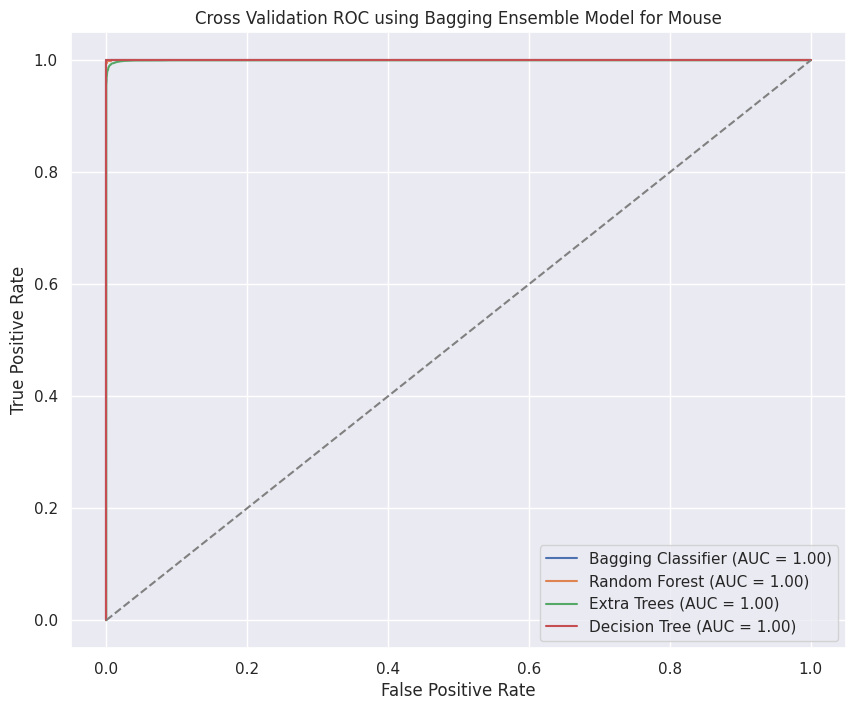

Results are saved in Bagging-crossvalidation-mouse-test.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import csv

# Assuming x is your feature matrix and y is your target variable
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check for infinity or very large values in X_train
if np.any(np.isinf(X_train)) or np.any(np.abs(X_train) > np.finfo(np.float32).max):
    # Preprocess your data to handle such values, for example, by scaling your features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

# Ensure y_train is properly formatted as a 1D array
y_train = np.ravel(y_train)

# Define base classifiers
base_classifiers = {
    "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=80, max_features='auto', min_samples_split=50, min_samples_leaf=10, random_state=0),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=40, max_features='auto', bootstrap=True, random_state=0),
    "Decision Tree": DecisionTreeClassifier(splitter='best', max_depth=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, random_state=0)
}

# Initialize lists to store metrics
metrics_list = []

# Initialize the figure for ROC curves
plt.figure(figsize=(10, 8))

# Perform 10-fold cross-validation and evaluate each model
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for clf_name, clf in base_classifiers.items():
    # Initialize lists to store metrics for each fold
    tp_list, fp_list, tn_list, fn_list = [], [], [], []

    for train_index, test_index in cv.split(X_train):
        X_cv_train, X_cv_test = X_train[train_index], X_train[test_index]
        y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]

        # Fit the model
        clf.fit(X_cv_train, y_cv_train)

        # Predict on test set
        y_pred = clf.predict(X_cv_test)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_cv_test, y_pred).ravel()

        # Append metrics to lists
        tp_list.append(tp)
        fp_list.append(fp)
        tn_list.append(tn)
        fn_list.append(fn)

    # Calculate average metrics
    avg_tp = np.mean(tp_list)
    avg_fp = np.mean(fp_list)
    avg_tn = np.mean(tn_list)
    avg_fn = np.mean(fn_list)
    avg_accuracy = (avg_tp + avg_tn) / (avg_tp + avg_fp + avg_tn + avg_fn)
    avg_specificity = avg_tn / (avg_tn + avg_fp)
    avg_sensitivity = avg_tp / (avg_tp + avg_fn)
    avg_mcc = matthews_corrcoef(y_train, clf.predict(X_train))

    # Store metrics in a dictionary
    metrics = {
        "Classifier": clf_name,
        "True Positive": avg_tp,
        "False Positive": avg_fp,
        "True Negative": avg_tn,
        "False Negative": avg_fn,
        "Accuracy": avg_accuracy,
        "Specificity": avg_specificity,
        "Sensitivity": avg_sensitivity,
        "MCC": avg_mcc
    }

    # Append metrics to list
    metrics_list.append(metrics)

    # Get predicted probabilities for ROC curve
    y_proba = clf.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='')

# Add labels and legend for ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross Validation ROC using Bagging Ensemble Model for Mouse')
plt.legend()

# Show ROC curve
plt.grid(True)
plt.show()

# Save results to a CSV file
csv_file = 'Bagging-crossvalidation-mouse-test.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Classifier', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity', 'MCC']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for metrics in metrics_list:
        writer.writerow(metrics)

print(f"Results are saved in {csv_file}")
